In [86]:
# validationf VeRITAS
# we validate how well veritas is doing when we cannot ask too many question
# Typically, we want to evaluate performance in conjunction with a CAT framework
# Conclusion: It seems CAT's question generation is not abest for Veritas
# we can ask similar number of questions, but get much better performance if we 
# generate the questiosn differently, namely questions that not only 
# take into account the goal of getting to diagnosis, but also detection of malingering

In [87]:
import sys
import pandas as pd
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
import pylab as plt
from sklearn import metrics
from zedstat import zedstat


In [88]:
# it seems R20 gets pretty high AUC and performs better than CAT
# we cannot test that with 713, because we onbly have cat results
# but teh deployment uses R20 (may tre rand)
# plots:
# i. kappa distr, ;; nu distr;; mu distr for model pos mpde neg
# do teh same for 304 dataset  (can estimate false positive)
# do it for deploy data set (failures are false negatives)
# it seems 304 dataset has only 3-7 malingerers, which is 7/86 or 1/12 or 8.3%

In [89]:
# resf is generated using calc_parallel_res.py

In [163]:
C0=.9
C1=0.76
C2=1.35
def malinger(row):
    if (row.lower_threshold < C0) and (row.score > C2):
        return -1
    if (row.veritas > C1) and (row.score > C2):
        return -1    
    if (row.score < C2):
        return 0
    else:
        return 1

In [164]:
resf=pd.read_csv('../res_R20_model1.csv',index_col=0).T
resf=pd.read_csv('../res_R20_model3.csv',index_col=0).T
resf=pd.read_csv('../res_R20_model2.csv',index_col=0).T
resf=pd.read_csv('../res_exp_model2.csv',index_col=0).T
#resf=pd.read_csv('../res_R20_model8.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
DX=False
if DX:
    resf['dx'] = [int(x[-1]) for x in resf.index.values]
else:
    resf['dx'] = [x>C2 for x in resf.score.values]


In [165]:
resf['mg']=resf.apply(malinger,axis=1)

In [166]:
if DX:
    fpr, tpr, thresholds = metrics.roc_curve(resf.dx.values.astype(int),resf.score.values.astype(float), pos_label=1)
    ff=pd.DataFrame(tpr,fpr,columns=['tpr']).assign(threshold=thresholds)
    ff.index.name='fpr'
    zt=zedstat.processRoc(df=ff.reset_index(),
                          order=3, 
                          total_samples=304,
                          positive_samples=86,
                          alpha=0.01,
                          prevalence=0.5)
    zt.smooth(STEP=0.001)
    zt.allmeasures(interpolate=True)
    zt.usample(precision=3)
    Z=zt.get()
    Z[Z.ppv>.875].tail(3)

fnr:  0.0779816513761468
full:  (0.8742732558139535, 0.9302263389753077, 0.8183702236034638)


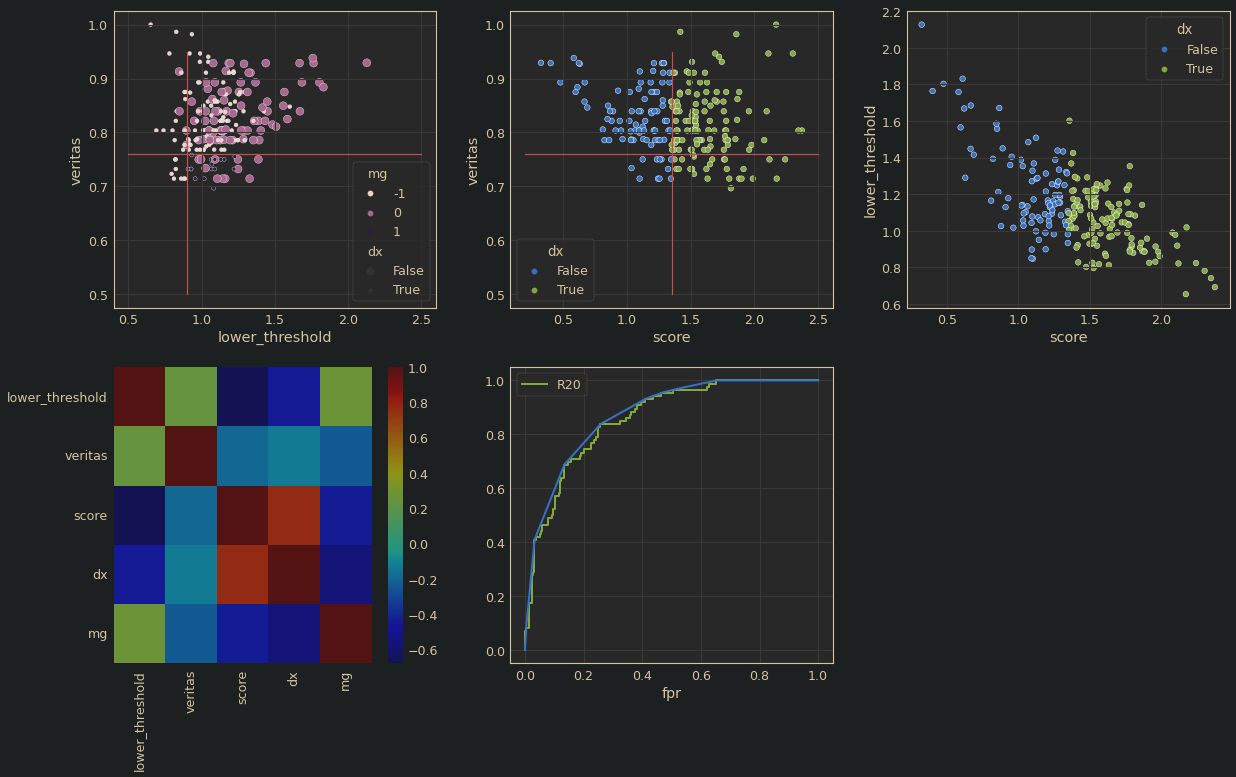

In [167]:
plt.figure(figsize=[20,12])
plt.subplot(231)
sns.scatterplot(data=resf,x='lower_threshold',y='veritas',hue='mg',size='dx')
plt.plot([.5,2.5],[.76,.76],'-r')
plt.plot([C0,C0],[.5,.95],'-r')

plt.subplot(232)
ax=sns.scatterplot(data=resf,x='score',y='veritas',hue='dx')
plt.plot([.2,2.5],[C1,C1],'-r')
plt.plot([C2,C2],[.5,.95],'-r')

plt.subplot(233)
sns.scatterplot(data=resf,x='score',y='lower_threshold',hue='dx')
plt.subplots_adjust(wspace=0.23)  # Adjust this value as needed

cf=resf.corr()
plt.subplot(234)
sns.heatmap(cf,cmap='jet',alpha=.5)
print('fnr: ',resf[(resf.mg==1)].index.size/resf.index.size)

plt.subplot(235)

plt.plot(fpr,tpr,'g',lw=2)
plt.gca().legend(['R20'])
zt.get().tpr.plot(style='-b',lw=2)
print('full: ',zt.auc())

In [168]:
resf

,lower_threshold,veritas,score,dx,mg
prolificuserjdxu06o70li_UK,0.887563,0.714286,1.880845,True,-1
prolificuserznbqrjgxnyd,1.764310,0.928571,0.401895,False,0
prolificuserkkoamwaa8x,1.151619,0.875000,1.215438,False,0
prolificuserenoxodnzcqa_UK,1.082792,0.696429,1.815410,True,1
prolificuseruu9wkw1ue2,1.025869,0.803571,1.554194,True,-1
...,...,...,...,...,...
prolificuservfpw5mtor4f_UK,0.802168,0.803571,1.473630,True,-1
prolificusermyugdsqgbq,0.959638,0.785714,1.790247,True,-1
prolificuser086kmobbvv2n_UK,0.885877,0.803571,1.778377,True,-1
prolificuser8dt970xc68b,0.740801,0.803571,2.345190,True,-1


In [169]:
resf[(resf.mg==-1)].index.size

111

In [109]:
resf

,lower_threshold,veritas,score,dx,mg
prolificuserjdxu06o70li_UK,0.887563,0.714286,1.880845,True,-1
prolificuserznbqrjgxnyd,1.764310,0.928571,0.401895,False,0
prolificuserkkoamwaa8x,1.151619,0.875000,1.215438,False,0
prolificuserenoxodnzcqa_UK,1.082792,0.696429,1.815410,True,1
prolificuseruu9wkw1ue2,1.025869,0.803571,1.554194,True,-1
...,...,...,...,...,...
prolificuservfpw5mtor4f_UK,0.802168,0.803571,1.473630,True,-1
prolificusermyugdsqgbq,0.959638,0.785714,1.790247,True,-1
prolificuser086kmobbvv2n_UK,0.885877,0.803571,1.778377,True,-1
prolificuser8dt970xc68b,0.740801,0.803571,2.345190,True,-1
